# CLASSIFICATION: PREPARING AND ANALYZING DATA

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd

#file_path = '/content/drive/MyDrive/SEM 2/NLP/GP/final_v2.csv'

#try:
#  final_v2 = pd.read_csv(file_path)
 # print("File loaded successfully.")
#except FileNotFoundError:
 # print(f"Error: File not found at {file_path}. Please check the file path.")
#except pd.errors.ParserError:
 # print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
#except Exception as e:
 # print(f"An unexpected error occurred: {e}")
final_v2 = pd.read_csv('data/final_v2.csv')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: 'data/final_v2.csv'

In [ ]:
import pandas as pd
import numpy as np

# Convert 'date' and 'next_rate_date' to datetime objects if they aren't already
final_v2['date'] = pd.to_datetime(final_v2['date'])
final_v2['next_rate_date'] = pd.to_datetime(final_v2['next_rate_date'])

# Calculate the difference in days
final_v2['days_to_next_decision'] = (final_v2['next_rate_date'] - final_v2['date']).dt.days

# Fill NaN values in 'days_to_next_decision' with the calculated difference
final_v2['days_to_next_decision'].fillna(final_v2['days_to_next_decision'], inplace=True)
print(final_v2.head())

        date                                              title  \
0 1999-01-03  Mr Ferguson reviews last year's economic perfo...   
1 1999-01-07  Mr Duisenberg's opening statement at the press...   
2 1999-01-14  Mr Duisenberg discusses the arrival of the eur...   
3 1999-01-15  Mr Ferguson expresses his views on monetary po...   
4 1999-01-18  Mr Duisenberg's opening statement at the Europ...   

                                         description  \
0  Remarks by Mr Roger W. Ferguson, Jr., a member...   
1  Introductory statement by the President of the...   
2  Speech by the President of the European Centra...   
3  Remarks by Mr Roger W. Ferguson, Jr., a member...   
4  Introductory statement by the President of the...   

                                                text               author  \
0  Mr Ferguson reviews last year's economic perfo...     Roger W Ferguson   
1  Mr Duisenberg's opening statement at the press...  Willem F Duisenberg   
2  Mr Duisenberg discusses th

In [ ]:
import pandas as pd

# Function to clean and combine description and text
def clean_missing_text(row):
    if pd.isna(row['clean_text']):
        description_part = (str(row['description']).strip() + " " if pd.notna(row['description']) else "")
        text_part = str(row['text']).strip()
        combined_text = (description_part + text_part).replace("\n", " ").replace("\t", " ").strip()
        combined_text = " ".join(combined_text.split())
        return combined_text
    clean_text = str(row['clean_text']).replace("\n", " ").replace("\t", " ").strip()
    clean_text = " ".join(clean_text.split())
    return clean_text

# Apply the cleaning function to the 'clean_text' column
final_v2['clean_text'] = final_v2.apply(clean_missing_text, axis=1)

Cleaning completed.


In [ ]:
import pandas as pd
if 'date' not in final_v2.columns:
    print("Error: 'date' column not found in the DataFrame.")
else:
    # Convert the 'date' column to datetime objects, handling errors
    try:
        final_v2['date'] = pd.to_datetime(final_v2['date'], errors='coerce')
    except ValueError as e:
        print(f"Error converting 'date' column to datetime: {e}")

    if final_v2['date'].isna().any():
        print("Warning: Some dates could not be parsed and are now NaT.")


    # Check if dates are sorted
    is_sorted = final_v2['date'].is_monotonic_increasing

    if is_sorted:
        print("Dates in the 'date' column are sorted chronologically.")
    else:
        print("Dates in the 'date' column are NOT sorted chronologically.")

Dates in the 'date' column are sorted chronologically.


The average length of texts is: 16308.827314238273


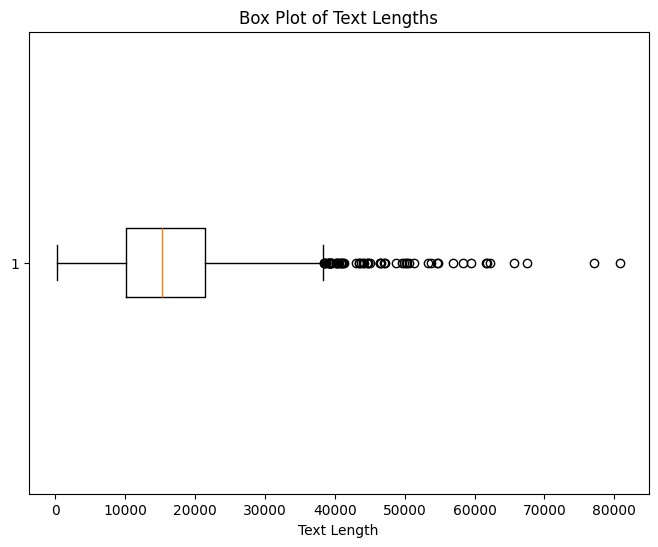

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average length of texts in the 'clean_text' column
if 'clean_text' in final_v2.columns:
    final_v2['text_length'] = final_v2['clean_text'].astype(str).apply(len)
    average_length = final_v2['text_length'].mean()
    print(f"The average length of texts is: {average_length}")

    # Create a box plot of the text lengths
    plt.figure(figsize=(8, 6))
    plt.boxplot(final_v2['text_length'], vert=False)
    plt.xlabel("Text Length")
    plt.title("Box Plot of Text Lengths")
    plt.show()
else:
    print("Error: 'clean_text' column not found in the DataFrame.")


In [ ]:
import numpy as np

# Calculate quartiles and IQR
Q1 = final_v2['text_length'].quantile(0.25)
Q3 = final_v2['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = final_v2[(final_v2['text_length'] < lower_bound) | (final_v2['text_length'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in the box plot: {num_outliers}")


Number of outliers in the box plot: 59


In [ ]:
# Create the ECB DataFrame
ECB = final_v2[final_v2['country'] == 'Euro area']
FED = final_v2[final_v2['country'] == 'United States']

In [ ]:
# Count the number of unique dates in the ECB DataFrame
unique_dates_count_ECB = ECB['next_rate_date'].nunique()

print(f"Number of unique next_rate_date in ECB (the number of times ECB has changed rates within this period): {unique_dates_count_ECB}")


Number of unique next_rate_date in ECB (the number of times ECB has changed rates within this period): 38


In [ ]:
diff_count_ECB = 0
for i in range(1, len(ECB)):
  if ECB['current_rate'].iloc[i] != ECB['current_rate'].iloc[i-1]:
    diff_count_ECB += 1

print(f"Number of records with different current_rate than the previous one: {diff_count_ECB}")


Number of records with different current_rate than the previous one: 38


In [ ]:
# Count the number of unique dates in the ECB DataFrame
unique_dates_count_FED = FED['next_rate_date'].nunique()

print(f"Number of unique next_rate_date in FED (the number of times FED has changed rates within this period): {unique_dates_count_FED}")

Number of unique next_rate_date in FED (the number of times FED has changed rates within this period): 236


In [ ]:
diff_count_FED = 0
for i in range(1, len(FED)):
  if FED['current_rate'].iloc[i] != FED['current_rate'].iloc[i-1]:
    diff_count_FED += 1

print(f"Number of records with different current_rate than the previous one: {diff_count_FED}")

Number of records with different current_rate than the previous one: 236


In [ ]:
len(ECB[ECB['days_to_next_decision'].isna()])

5

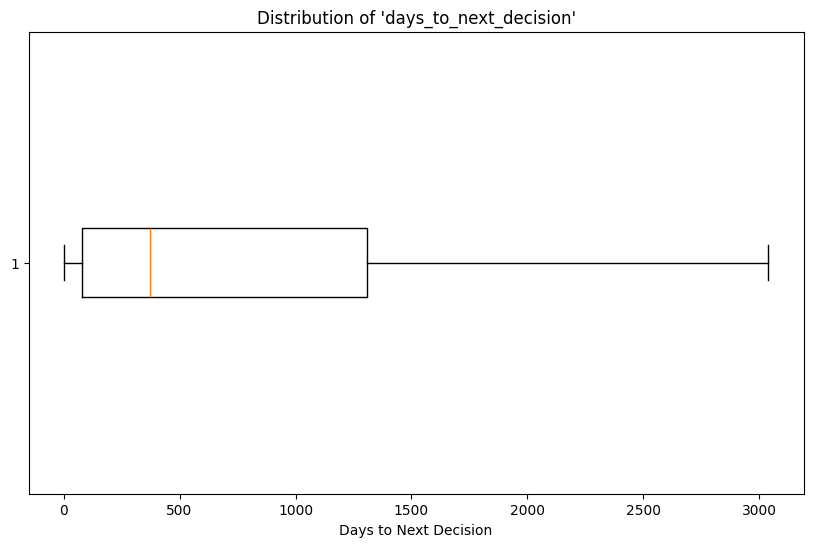

In [ ]:
import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ECB['days_to_next_decision'].dropna(), vert=False)
plt.title("Distribution of 'days_to_next_decision'")
plt.xlabel("Days to Next Decision")
plt.show()

In [ ]:
len(FED[FED['days_to_next_decision'].isna()])

33

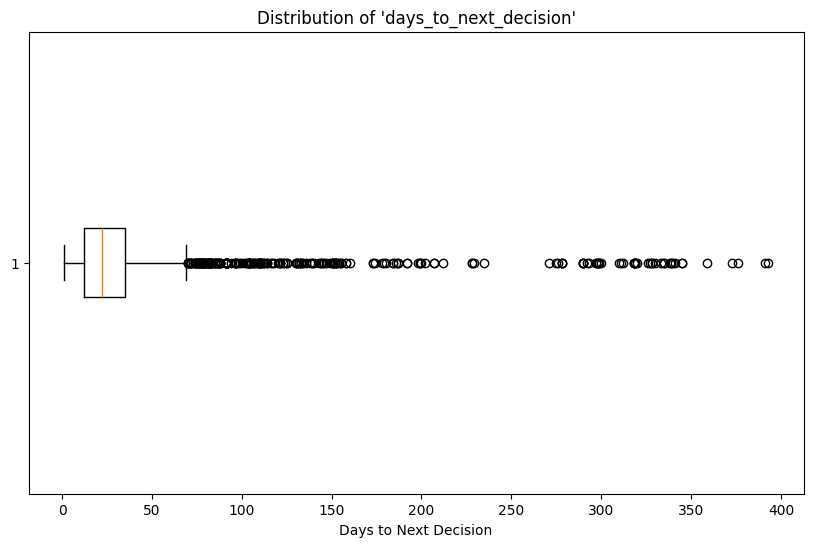

In [ ]:
import matplotlib.pyplot as plt

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(FED['days_to_next_decision'].dropna(), vert=False)
plt.title("Distribution of 'days_to_next_decision'")
plt.xlabel("Days to Next Decision")
plt.show()

In [ ]:
# Find rows with NaN values in 'next_rate'
nan_next_rate = final_v2[final_v2['next_rate'].isna()]

# Find rows with NaN values in 'next_rate_date'
nan_next_rate_date = final_v2[final_v2['next_rate_date'].isna()]

# Check if the indices of the NaN rows are the same
same_indices = nan_next_rate.index.equals(nan_next_rate_date.index)

if same_indices:
  print("Rows with NaN values in 'next_rate' and 'next_rate_date' are the same.")
else:
  print("Rows with NaN values in 'next_rate' and 'next_rate_date' are NOT the same.")

# Further analysis (optional):  Identify the rows that differ
if not same_indices:
    # Rows in next_rate but not next_rate_date
    diff1 = nan_next_rate.index.difference(nan_next_rate_date.index)
    print(f"\nIndices present in 'next_rate' NaN but not in 'next_rate_date' NaN: {diff1.tolist()}")

    # Rows in next_rate_date but not next_rate
    diff2 = nan_next_rate_date.index.difference(nan_next_rate.index)
    print(f"\nIndices present in 'next_rate_date' NaN but not in 'next_rate' NaN: {diff2.tolist()}")


Rows with NaN values in 'next_rate' and 'next_rate_date' are the same.


In [ ]:
print(final_v2['rate_change_direction'].unique())


['no change' 'increase' 'decrease']


In [ ]:
# Create test_raw DataFrame with rows where 'rate_difference' is NaN
test_raw = final_v2[final_v2['rate_difference'].isna()]

# Create train_raw DataFrame with rows where 'rate_difference' is NOT NaN
train_raw = final_v2[~final_v2['rate_difference'].isna()]


In [ ]:
import pandas as pd
# Fill NaN values in 'days_to_next_decision' with the difference between 'next_rate_date' and 'date'
final_v2['next_rate_date'] = pd.to_datetime(final_v2['next_rate_date'], errors='coerce')
final_v2['days_to_next_decision'] = final_v2.apply(lambda row: (row['next_rate_date'] - row['date']).days if pd.notna(row['next_rate_date']) and pd.notna(row['date']) else row['days_to_next_decision'], axis=1)


In [ ]:
# Create the 'label' column in train_raw
train_raw['label'] = train_raw['rate_difference'].apply(lambda x: 'rise' if x > 0 else 'cut')

<ipython-input-28-d15522d259e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_raw['label'] = train_raw['rate_difference'].apply(lambda x: 'rise' if x > 0 else 'cut')


In [ ]:
train_df1 = train_raw[['clean_text', 'label']]
train_df1.head()

,clean_text,label
0,"Remarks by Mr Roger W. Ferguson, Jr., a member...",rise
1,Introductory statement by the President of the...,cut
2,Speech by the President of the European Centra...,cut
3,"Remarks by Mr Roger W. Ferguson, Jr., a member...",rise
4,Introductory statement by the President of the...,cut


In [ ]:
# Count the number of rows with 'cut' and 'rise' labels
cut_count = len(train_df1[train_df1['label'] == 'cut'])
rise_count = len(train_df1[train_df1['label'] == 'rise'])

print(f"Number of rows with 'cut' label: {cut_count}")
print(f"Number of rows with 'rise' label: {rise_count}")


Number of rows with 'cut' label: 2329
Number of rows with 'rise' label: 2451


In [ ]:
# Save train_df1 to a CSV file
#train_df1.to_csv('/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv', index=False)


# BASELINE MODEL FOR TWO WAYS CLASSIFICATION: THE HULK

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np


# Extract features and labels
X_train = train_df1['clean_text'].values
y_train = train_df1['label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y_train.dtype, np.number):
    label_mapping = {'cut': 0, 'rise': 1}
    y_train = [label_mapping[label] for label in y_train]

# TF-IDF Vectorization (character 2-6 grams)
tfidf_vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Logistic Regression Model (L2 regularization)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Evaluate model using 15-fold cross-validation
macro_f1 = cross_val_score(model, X_train_tfidf, y_train, cv=15, scoring=make_scorer(f1_score, average='macro'))

print(f"Macro F1 Score (15-fold CV): {np.mean(macro_f1):.4f} ± {np.std(macro_f1):.4f}")


Macro F1 Score (15-fold CV): 0.5558 ± 0.1397


# FINE TUNING SELECT K FEATURES (5 FOLDS CROSS VALIDATION TO SPEED UP THE PROCESS)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Load the data
#train_df1 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv')
train_df1 = pd.read_csv('data/train_df1.csv')

X = train_df1['clean_text'].values
y = train_df1['label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y.dtype, np.number):
    label_mapping = {'cut': 0, 'rise': 1}
    y = np.array([label_mapping[label] for label in y])

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

# Define the grid search parameters
param_grid = {
    'chi2__k': [1000, 5000, 10000, 20000, 30000]
}

# Cross-Validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Run the grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best K:", grid_search.best_params_)
print("Best Macro F1 Score:", grid_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best K: {'chi2__k': 30000}
Best Macro F1 Score: 0.661250598427673


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Load the data
#train_df1 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv')
train_df1 = pd.read_csv('data/train_df1.csv')

# Extract features and labels
X = train_df1['clean_text'].values
y = train_df1['label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y.dtype, np.number):
    label_mapping = {'cut': 0, 'rise': 1}
    y = np.array([label_mapping[label] for label in y])

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2, k=30000)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

# Cross-Validation (15 folds)
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Run cross-validation
macro_f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scorer, n_jobs=-1)

print(f"Macro F1 Score (15-fold CV, K=30000): {np.mean(macro_f1_scores):.4f} ± {np.std(macro_f1_scores):.4f}")


Macro F1 Score (15-fold CV, K=30000): 0.6598 ± 0.0343


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score

# Load the data
#train_df1 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/train_df1.csv')
train_df1 = pd.read_csv('data/train_df1.csv')

X = train_df1['clean_text'].values
y = train_df1['label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y.dtype, np.number):
    label_mapping = {'cut': 0, 'rise': 1}
    y = np.array([label_mapping[label] for label in y])

# Split data into 14/15 training and 1/15 validation
skf = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
train_index, val_index = next(skf.split(X, y))

X_train, X_val = X[train_index], X[val_index]
y_train, y_val = y[train_index], y[val_index]

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2, k=30000)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
])

# Train the final model on 14/15
pipeline.fit(X_train, y_train)

# Make predictions on the 1/15 holdout set
y_pred = pipeline.predict(X_val)

# Evaluate
print("📋 Classification Report on holdout set:")
print(classification_report(y_val, y_pred, target_names=['cut', 'rise']))
macro_f1 = f1_score(y_val, y_pred, average='macro')
print(f"\n Macro F1: {macro_f1:.4f}")


📋 Classification Report on holdout set:
              precision    recall  f1-score   support

         cut       0.74      0.63      0.68       155
        rise       0.70      0.79      0.74       164

    accuracy                           0.71       319
   macro avg       0.72      0.71      0.71       319
weighted avg       0.72      0.71      0.71       319


✅ Macro F1: 0.7118


# TESTING ON UNSEEN DATA


In [ ]:
test_df = test_raw[['date','clean_text']]
test_df.head()

,date,clean_text
4773,2025-01-06,"January 06, 2025 An Assessment of the Economy ..."
4774,2025-01-08,"January 08, 2025 Challenges Facing Central Ban..."
4775,2025-01-09,"January 09, 2025 Reflections on 2024: Monetary..."
4778,2025-01-31,"January 31, 2025 Brief Remarks on the Economy,..."
4779,2025-02-04,"February 04, 2025 U.S. Economic Outlook and Mo..."


In [ ]:
import pandas as pd

# Extract the texts
X_test = test_df['clean_text'].values

# Predict the labels using the existing trained pipeline
predictions = pipeline.predict(X_test)

# Convert numerical labels back to original
inverse_label_mapping = {0: 'cut', 1: 'rise'}
predicted_labels = [inverse_label_mapping[label] for label in predictions]

# Create the results dataframe
results_df = test_df.copy()
results_df['predicted_label'] = predicted_labels

# Display the results
from IPython.display import display
display(results_df.head())

,date,clean_text,predicted_label
4773,2025-01-06,"January 06, 2025 An Assessment of the Economy ...",rise
4774,2025-01-08,"January 08, 2025 Challenges Facing Central Ban...",rise
4775,2025-01-09,"January 09, 2025 Reflections on 2024: Monetary...",rise
4778,2025-01-31,"January 31, 2025 Brief Remarks on the Economy,...",rise
4779,2025-02-04,"February 04, 2025 U.S. Economic Outlook and Mo...",rise


# Trying training with cut off

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score

# Load the data
#train_df1 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/03_MAT/train_df1.csv')
train_df1 = pd.read_csv('data/train_df1.csv')

# Extract features and labels
X_all = train_df1['clean_text'].values
y_all = train_df1['label'].values

# Encode labels if needed
if not np.issubdtype(y_all.dtype, np.number):
    label_mapping = {'cut': 0, 'rise': 1}
    y_all = np.array([label_mapping[label] for label in y_all])

# ------------------------- #
#  Train on first 14/15, test on last 1/15
# ------------------------- #
n = len(X_all)
cutoff = int(n * 14 / 15)

X_train = X_all[:cutoff]
y_train = y_all[:cutoff]

X_test = X_all[cutoff:]
y_test = y_all[cutoff:]

# ------------------------- #
#  Pipeline
# ------------------------- #
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2, k=30000)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced'))
])

# Train on 14/15
pipeline.fit(X_train, y_train)

# Predict on 1/15
y_pred = pipeline.predict(X_test)


print(" Classification Report on 1/15 holdout set:")
print(classification_report(y_test, y_pred, target_names=['cut', 'rise']))
print(f" Macro F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")


📋 Classification Report on 1/15 holdout set:
              precision    recall  f1-score   support

         cut       1.00      0.02      0.04       272
        rise       0.15      1.00      0.26        47

    accuracy                           0.16       319
   macro avg       0.57      0.51      0.15       319
weighted avg       0.87      0.16      0.07       319

✅ Macro F1 Score: 0.1482


In [ ]:
import pandas as pd

# Extract the texts
X_test = test_df['clean_text'].values

# Predict the labels using the existing trained pipeline
predictions = pipeline.predict(X_test)

# Convert numerical labels back to original
inverse_label_mapping = {0: 'cut', 1: 'rise'}
predicted_labels = [inverse_label_mapping[label] for label in predictions]

# Create the results dataframe
results_df = test_df.copy()
results_df['predicted_label'] = predicted_labels

# Display the results
from IPython.display import display
display(results_df.head())

# 5 WAYS CLASSIFICATION

In [ ]:
df = final_v2.dropna(subset=['next_rate'])

In [ ]:
df_filtro = df[['clean_text', 'current_rate', 'next_rate', 'rate_difference', 'days_to_next_decision', 'country']]

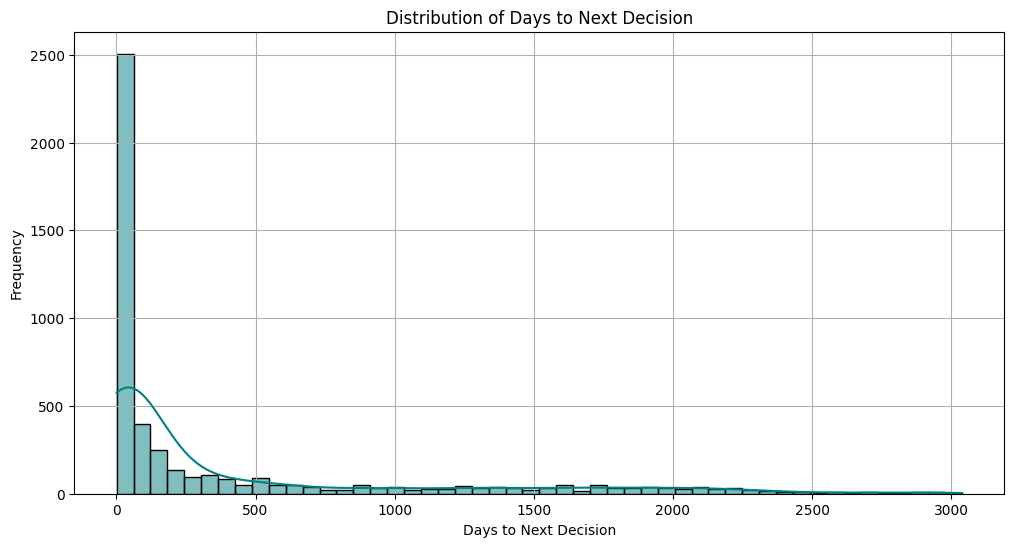


Summary Statistics for 'days_to_next_decision':
count    4780.000000
mean      404.657113
std       668.814024
min         1.000000
25%        20.000000
50%        54.000000
75%       442.250000
max      3039.000000
Name: days_to_next_decision, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'days_to_next_decision'
plt.figure(figsize=(12, 6))
sns.histplot(df_filtro['days_to_next_decision'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of Days to Next Decision')
plt.xlabel('Days to Next Decision')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display summary statistics
print("\nSummary Statistics for 'days_to_next_decision':")
print(df_filtro['days_to_next_decision'].describe())


<ipython-input-38-bf63eb7d4819>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['decision_period'] = pd.cut(df_filtro['days_to_next_decision'], bins=bins, labels=labels)
<ipython-input-38-bf63eb7d4819>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtro, x='decision_period', order=labels, palette='viridis')


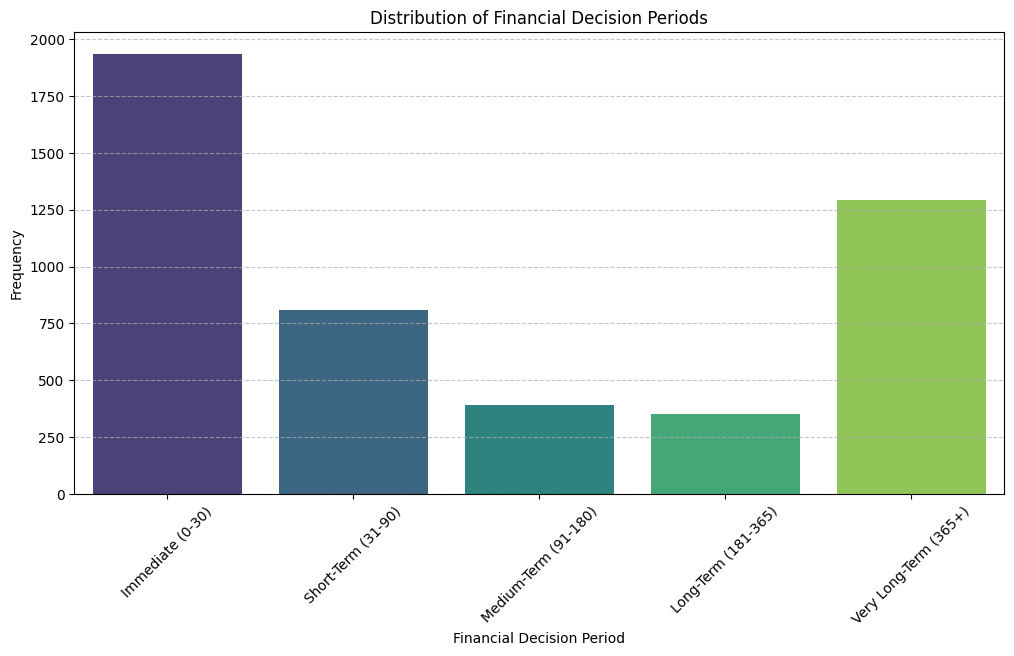

,proportion
decision_period,
Immediate (0-30),0.404603
Very Long-Term (365+),0.270084
Short-Term (31-90),0.169038
Medium-Term (91-180),0.082218
Long-Term (181-365),0.074059


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define financial ranges
bins = [0, 30, 90, 180, 365, df_filtro['days_to_next_decision'].max()]
labels = ['Immediate (0-30)', 'Short-Term (31-90)', 'Medium-Term (91-180)', 'Long-Term (181-365)', 'Very Long-Term (365+)']

# Create a new column with financial ranges
df_filtro['decision_period'] = pd.cut(df_filtro['days_to_next_decision'], bins=bins, labels=labels)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtro, x='decision_period', order=labels, palette='viridis')
plt.title('Distribution of Financial Decision Periods')
plt.xlabel('Financial Decision Period')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Show the distribution to evaluate balance
decision_period_distribution = df_filtro['decision_period'].value_counts(normalize=True)

df_filtro

decision_period_distribution


<ipython-input-63-72a8661edf50>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['five_way_label'] = df_filtro.apply(classify_five_way, axis=1)
<ipython-input-63-72a8661edf50>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtro, x='five_way_label', order=['Immediate Cut', 'Immediate Rise', 'Upcoming Cut', 'Upcoming Rise', 'Stable'], palette='Set2')


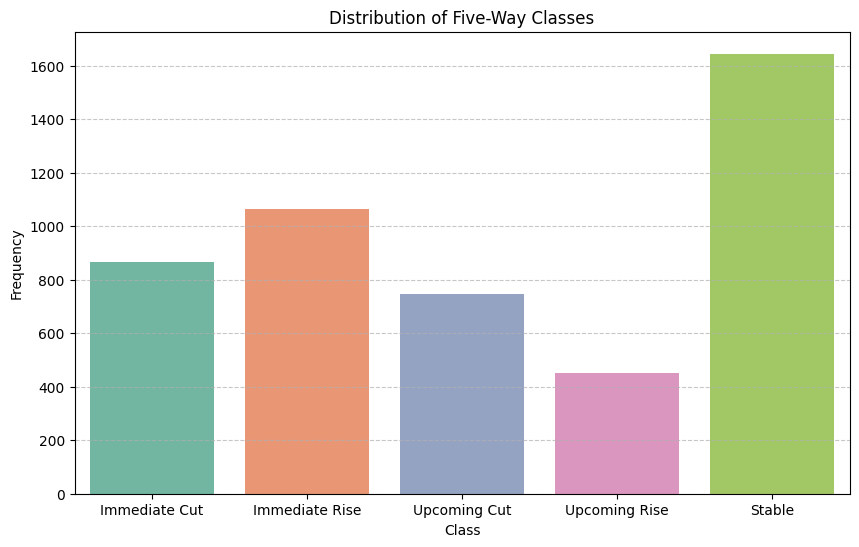


Five-Way Label Distribution:
five_way_label
Stable            0.344142
Immediate Rise    0.223013
Immediate Cut     0.181590
Upcoming Cut      0.156485
Upcoming Rise     0.094770
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the five-way classification function
def classify_five_way(row):
    # Immediate decisions (cut or rise within 30 days)
    if row['days_to_next_decision'] <= 30:
        if row['rate_difference'] < 0:
            return 'Immediate Cut'
        elif row['rate_difference'] > 0:
            return 'Immediate Rise'
        else:
            return 'Stable'

    # Upcoming decisions (cut or rise within 31-180 days)
    elif 31 <= row['days_to_next_decision'] <= 180:
        if row['rate_difference'] < 0:
            return 'Upcoming Cut'
        elif row['rate_difference'] > 0:
            return 'Upcoming Rise'
        else:
            return 'Stable'

    # Stable (long term or very long term, 181+ days)
    else:
        return 'Stable'

# Apply the classification
df_filtro['five_way_label'] = df_filtro.apply(classify_five_way, axis=1)

# Plot the distribution of the new five-way labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtro, x='five_way_label', order=['Immediate Cut', 'Immediate Rise', 'Upcoming Cut', 'Upcoming Rise', 'Stable'], palette='Set2')
plt.title('Distribution of Five-Way Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Show the distribution
print("\nFive-Way Label Distribution:")
print(df_filtro['five_way_label'].value_counts(normalize=True))

# Save the updated dataframe for later use
#df_filtro[['clean_text','five_way_label']].to_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv', index=False)


In [ ]:
#pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv')
pd.read_csv('data/5_way_class.csv')

,clean_text,five_way_label
0,"Remarks by Mr Roger W. Ferguson, Jr., a member...",Immediate Rise
1,Introductory statement by the President of the...,Upcoming Cut
2,Speech by the President of the European Centra...,Upcoming Cut
3,"Remarks by Mr Roger W. Ferguson, Jr., a member...",Immediate Rise
4,Introductory statement by the President of the...,Upcoming Cut
...,...,...
4775,A middle path for ECB monetary policy Speech b...,Upcoming Cut
4776,European Parliament plenary debate on the ECB ...,Immediate Cut
4777,From concept to delivery: accounting for clima...,Immediate Cut
4778,Striking the right balance: the ECBs balance s...,Immediate Cut


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Load the data
#train_df2 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv')
train_df2 = pd.read_csv('data/5_way_class.csv')

# Extract features and labels
X_train = train_df2['clean_text'].values
y_train = train_df2['five_way_label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y_train.dtype, np.number):
    label_mapping = {
        'Immediate Cut': 0,
        'Immediate Rise': 1,
        'Upcoming Cut': 2,
        'Upcoming Rise': 3,
        'Stable': 4
    }
    y_train = np.array([label_mapping[label] for label in y_train])

# TF-IDF Vectorization (character 2-6 grams)
tfidf_vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Logistic Regression Model (L2 regularization)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced')

# Cross-Validation (15 folds)
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Run cross-validation
macro_f1 = cross_val_score(model, X_train_tfidf, y_train, cv=cv, scoring=scorer, n_jobs=-1)

print(f"Macro F1 Score (15-fold CV, 5-way classification): {np.mean(macro_f1):.4f} ± {np.std(macro_f1):.4f}")



Macro F1 Score (15-fold CV, 5-way classification): 0.3635 ± 0.0190


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Load the data
#train_df2 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv')

# Extract features and labels
X_train = train_df2['clean_text'].values
y_train = train_df2['five_way_label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y_train.dtype, np.number):
    label_mapping = {
        'Immediate Cut': 0,
        'Immediate Rise': 1,
        'Upcoming Cut': 2,
        'Upcoming Rise': 3,
        'Stable': 4
    }
    y_train = np.array([label_mapping[label] for label in y_train])

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced'))
])

# Define the grid search parameters
param_grid = {
    'chi2__k': [1000, 5000, 10000, 20000, 30000]
}

# Cross-Validation (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Run the grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\n Best K:", grid_search.best_params_)
print(f" Best Macro F1 Score: {grid_search.best_score_:.4f}")

# Print detailed results for each k
results = pd.DataFrame(grid_search.cv_results_)
print("\n Detailed Results:")
results_df = results[['param_chi2__k', 'mean_test_score', 'std_test_score']]
print(results_df.sort_values(by='mean_test_score', ascending=False))


Fitting 5 folds for each of 5 candidates, totalling 25 fits

🔍 Best K: {'chi2__k': 30000}
✅ Best Macro F1 Score: 0.3438

📊 Detailed Results:
   param_chi2__k  mean_test_score  std_test_score
4          30000         0.343767        0.009137
3          20000         0.341661        0.007297
2          10000         0.328783        0.007318
1           5000         0.312908        0.009327
0           1000         0.285088        0.008640


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Load the data
#train_df2 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv')

# Extract features and labels
X_train = train_df2['clean_text'].values
y_train = train_df2['five_way_label'].values

# Convert labels to numerical format if needed
if not np.issubdtype(y_train.dtype, np.number):
    label_mapping = {
        'Immediate Cut': 0,
        'Immediate Rise': 1,
        'Upcoming Cut': 2,
        'Upcoming Rise': 3,
        'Stable': 4
    }
    y_train = np.array([label_mapping[label] for label in y_train])

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2, k=25000)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced'))
])

# Cross-Validation (15 folds)
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# Run cross-validation
macro_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=scorer, n_jobs=-1)

print(f"Macro F1 Score (15-fold CV, K=30000, 5-way classification): {np.mean(macro_f1_scores):.4f} ± {np.std(macro_f1_scores):.4f}")


Macro F1 Score (15-fold CV, K=30000, 5-way classification): 0.3479 ± 0.0148


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, classification_report

# Load the data
#train_df2 = pd.read_csv('/content/drive/MyDrive/SEM 2/NLP/GP/5_way_class.csv')

# Extract features and labels
X_train = train_df2['clean_text'].values
y_train = train_df2['five_way_label'].values

# Convert labels to numerical format if needed
label_mapping = {
    'Immediate Cut': 0,
    'Immediate Rise': 1,
    'Upcoming Cut': 2,
    'Upcoming Rise': 3,
    'Stable': 4
}
if not np.issubdtype(y_train.dtype, np.number):
    y_train = np.array([label_mapping[label] for label in y_train])

# 14/15 train-validation split
kf = KFold(n_splits=15, shuffle=True, random_state=42)
train_index, val_index = next(kf.split(X_train))

X_train_final = X_train[train_index]
y_train_final = y_train[train_index]
X_val_final = X_train[val_index]
y_val_final = y_train[val_index]

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 6))),
    ('chi2', SelectKBest(score_func=chi2, k=25000)),
    ('clf', LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, class_weight='balanced'))
])

# Train the model on 14/15 of the data
pipeline.fit(X_train_final, y_train_final)

# Validate on the remaining 1/15
y_val_pred = pipeline.predict(X_val_final)

#  Classification Report
print("\n Classification Report on holdout set:")
print(classification_report(y_val_final, y_val_pred, target_names=label_mapping.keys()))

#  Macro F1 Score
macro_f1 = f1_score(y_val_final, y_val_pred, average='macro')
print(f"\n Macro F1 (14/15 Train, 1/15 Validation): {macro_f1:.4f}")



📋 Classification Report on holdout set:
                precision    recall  f1-score   support

 Immediate Cut       0.41      0.25      0.31        61
Immediate Rise       0.49      0.73      0.59        77
  Upcoming Cut       0.57      0.08      0.15        48
 Upcoming Rise       0.50      0.03      0.06        31
        Stable       0.57      0.89      0.70       102

      accuracy                           0.52       319
     macro avg       0.51      0.40      0.36       319
  weighted avg       0.51      0.52      0.45       319


✅ Macro F1 (14/15 Train, 1/15 Validation): 0.3592


In [ ]:
# Extract the texts
X_test = test_df['clean_text'].values

# Predict the labels using the existing trained pipeline
predictions = pipeline.predict(X_test)

# Convert numerical labels back to original
inverse_label_mapping = {
    0: 'Immediate Cut',
    1: 'Immediate Rise',
    2: 'Upcoming Cut',
    3: 'Upcoming Rise',
    4: 'Stable'
}
predicted_labels = [inverse_label_mapping[label] for label in predictions]

# Create the results dataframe
results_df = test_df.copy()
results_df['predicted_label'] = predicted_labels

# Display the results
from IPython.display import display
display(results_df.head())

,date,clean_text,predicted_label
4773,2025-01-06,"January 06, 2025 An Assessment of the Economy ...",Immediate Rise
4774,2025-01-08,"January 08, 2025 Challenges Facing Central Ban...",Immediate Rise
4775,2025-01-09,"January 09, 2025 Reflections on 2024: Monetary...",Immediate Rise
4778,2025-01-31,"January 31, 2025 Brief Remarks on the Economy,...",Immediate Rise
4779,2025-02-04,"February 04, 2025 U.S. Economic Outlook and Mo...",Immediate Rise


In [ ]:
results_df

,date,clean_text,predicted_label
4773,2025-01-06,"January 06, 2025 An Assessment of the Economy ...",Immediate Rise
4774,2025-01-08,"January 08, 2025 Challenges Facing Central Ban...",Immediate Rise
4775,2025-01-09,"January 09, 2025 Reflections on 2024: Monetary...",Immediate Rise
4778,2025-01-31,"January 31, 2025 Brief Remarks on the Economy,...",Immediate Rise
4779,2025-02-04,"February 04, 2025 U.S. Economic Outlook and Mo...",Immediate Rise
4781,2025-02-05,"February 05, 2025 Bank Regulation in 2025 and ...",Immediate Rise
4782,2025-02-05,"February 05, 2025 Do Non-inflationary Economic...",Immediate Rise
4783,2025-02-05,"February 05, 2025 Bank Regulation in 2025 and ...",Immediate Rise
4784,2025-02-05,"February 05, 2025 Bank Regulation in 2025 and ...",Immediate Rise
4785,2025-02-07,"February 07, 2025 Entrepreneurship and Aggrega...",Immediate Rise
